# Salary Survey Analysis 

### Team Members:


Saja Adel 220029219

Fatimah Albaqshi 221419327

Asaeil AlAskar 21930652


## Introduction:

In thie project, we explore salary dynamics and their multifaceted influences. Personal attributes, such as age, workclass, education,and race significantly impact salaries. We investigate the interplay between personality traits and income, utilizing a diverse dataset from "Census Income" dataset with 14 distinct attributes. Our research aims to unveil industry-specific disparities, analyze the relationship between experience and income growth, and explore regional variations in compensation. We also address the impact of gender on pay differentials, as well as correlations with factors like race and education levels. Therefore, we aim to build a model that predicts future salaries based on personal attributes.

## Problem Statetment:

The objective of this project is to analyze a dataset and develop a salary prediction model that identifies the most influential features determining the salary.

## Objectives:

The objective is to build and compare machine learning models to most accurately predict salaries based on factors like working hours, age and gender. Models like linear regression and random forest will be evaluated using metrics like MAE and R-squared to select the best performing model.

This will empower job seekers by providing individualized salary ranges to make informed career decisions when negotiating compensation or evaluating offers. Comparing model performance will identify the most effective algorithms for salary data, guiding future improvements.

## Selected Dataset: 

The "Census Income" dataset, extracted from the 1994 Census database by Barry Becker, is selected for a data science project focused on salary predictions. The dataset consists of 48,842 instances and 14 features, making it a multivariate dataset with both categorical and integer feature types. The subject area of the dataset is social science, and the associated task is classification, specifically predicting whether a person's income exceeds $50,000 per year.

The dataset has missing values and includes features such as age, workclass, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, and native country. The dataset was extracted using specific conditions related to age, income, weight, and hours worked per week.

# Part 1: Read and Explore Data 

In [1]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics



def printmd(string):
    display(Markdown(string))
    
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


%matplotlib inline

In [2]:
adult = pd.read_csv('adult.csv')

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']



### 1.1. Columns and their types

In [3]:
# Setting all the categorical columns to type category
for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')
    
print(adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB
None


### 1.2. Data

In [4]:
# Top 5 records
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 1.3. Summary Statistics

In [5]:
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Part 2: Data Preprocessing

### 2.1. Hnadling Missing Values

In [6]:
# Copy the dataframe
copy1 = adult.copy()

# Print columns with missing values
for column in adult.columns:
    count = (adult[column] == '?').sum()
    if count > 0:
        print(column + ': ' + str(count) + ' records')

workclass: 1836 records
occupation: 1843 records
native.country: 583 records


In [7]:
# Drop rows that has missing values
print('-'*60)
print('Before removing missing values:', copy1.shape)

adult = adult[~(adult == '?').any(axis=1)]

print('After removing missing values:', adult.shape)

------------------------------------------------------------
Before removing missing values: (32561, 15)
After removing missing values: (30162, 15)


### 2.2. Removing Duplicates

In [8]:
adult.loc[adult.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
7978,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8356,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8500,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9067,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
9269,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
9305,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [9]:
adult.drop_duplicates(keep=False).shape

(30117, 15)

# Part 3: Visualization 

### 3.1. Distribution of Income

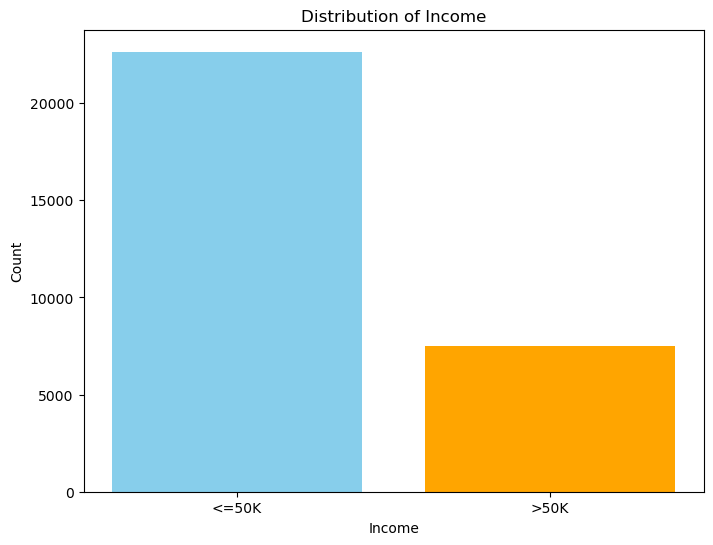

In [10]:
# Visualize the distribution of income
 

income_counts = adult['income'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(income_counts.index, income_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')

# Show plot
plt.show()

### 3.2. Distribution of Age

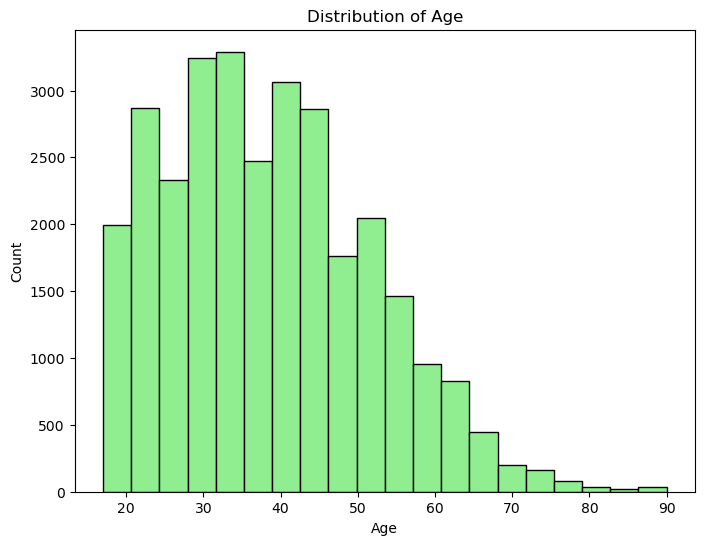

In [11]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
plt.hist(adult['age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show plot
plt.show()

### 3.3. Distribution of Education

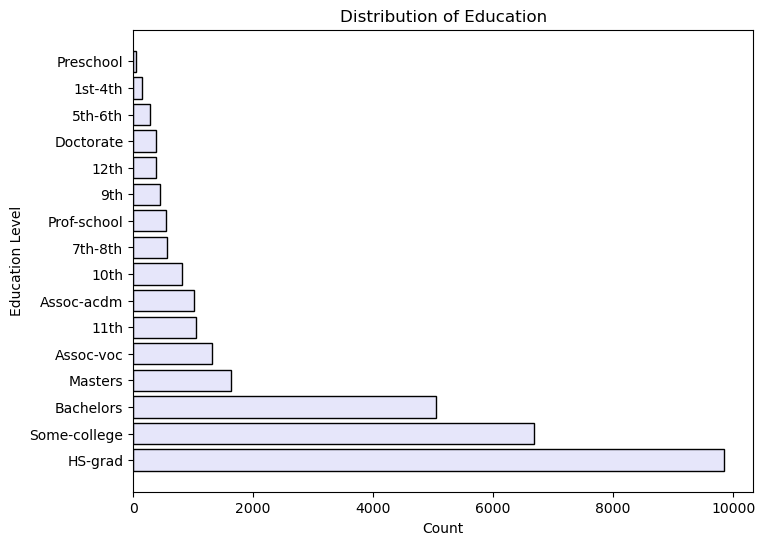

In [12]:
# Visualize the distribution of education
education_counts = adult['education'].value_counts()

# Set up plot
plt.figure(figsize=(8, 6))
plt.barh(education_counts.index, education_counts.values, color='lavender',edgecolor='black')

# Customize plot appearance
plt.title('Distribution of Education')
plt.xlabel('Count')
plt.ylabel('Education Level')

# Show plot
plt.show()

### 3.4. Distribution of Hours per Week

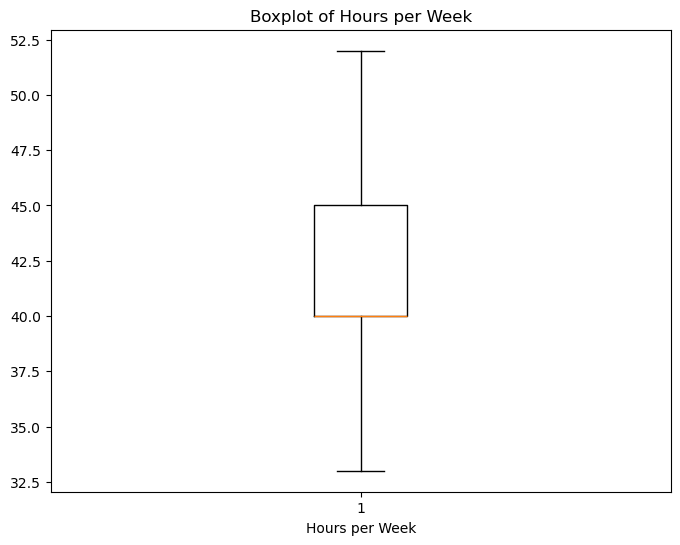

In [13]:
 # Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(adult['hours.per.week'], showfliers=False)

plt.title('Boxplot of Hours per Week')
plt.xlabel('Hours per Week')

# Show the plot
plt.show()

### 3.5. Distribution of Race

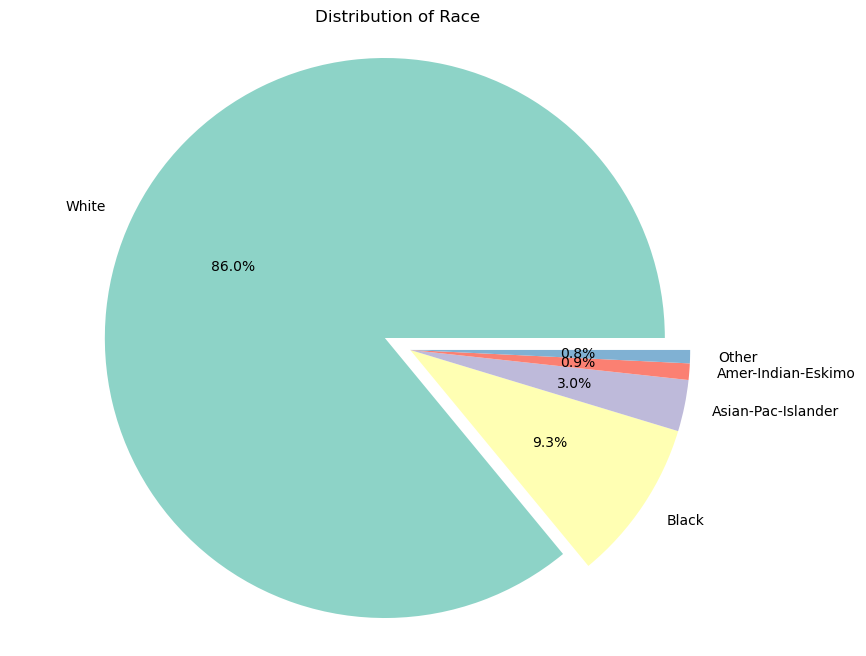

In [14]:
 #Calculate the count of each race category
race_counts = adult['race'].value_counts()

#Create a pie chart
plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0, 0) # Explode the first slice
colors = plt.cm.Set3.colors # Set color scheme

plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%',colors=colors, explode=explode)
plt.title('Distribution of Race')

#Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

### 3.6. Correlation Matrix

In [15]:
 # Select only numeric columns
numeric_columns = adult.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Print the correlation matrix
print(corr_matrix)

                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education.num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital.gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital.loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours.per.week  0.101599 -0.022886       0.152522      0.080432      0.052417   

                hours.per.week  
age                   0.101599  
fnlwgt               -0.022886  
education.num         0.152522  
capital.gain          0.080432  
capital.loss          0.052417  
hours.per.week        1.000000  


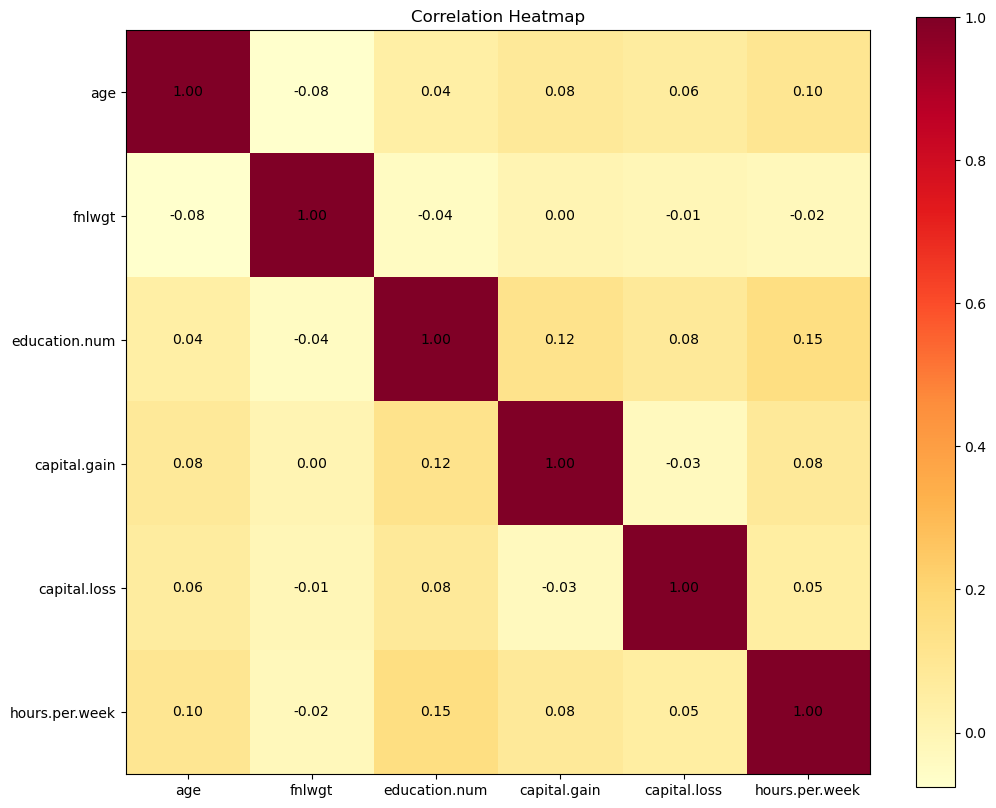

In [16]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Create the heatmap with values
heatmap = ax.imshow(corr_matrix, cmap='YlOrRd')

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax)

# Set the tick labels and title
ax.set_xticks(np.arange(corr_matrix.shape[1]))
ax.set_yticks(np.arange(corr_matrix.shape[0]))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
ax.set_title('Correlation Heatmap')

# Show correlation values inside the heatmap
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        ax.text(j, i, format(corr_matrix.iloc[i, j], ".2f"),
                ha="center", va="center", color="black")

# Show the heatmap
plt.show()

### 3.7. Education vs Income

C:\Users\joya_\AppData\Local\Temp\ipykernel_11096\1716936687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_proportion = adult.groupby('education')['income'].value_counts(normalize=True).unstack()


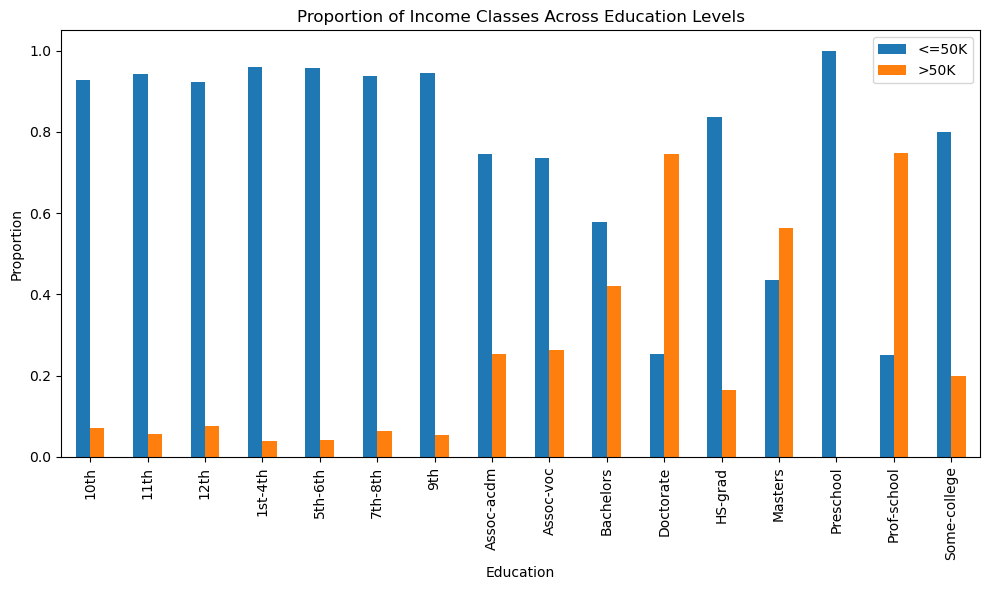

In [17]:
# Calculate the proportion of income classes across education levels
income_proportion = adult.groupby('education')['income'].value_counts(normalize=True).unstack()

# Plot the bar graph
income_proportion.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.title('Proportion of Income Classes Across Education Levels')

# Display the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 3.8. Gender vs Income

C:\Users\joya_\AppData\Local\Temp\ipykernel_11096\1500540780.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_proportion = adult.groupby('sex')['income'].value_counts(normalize=True).unstack()


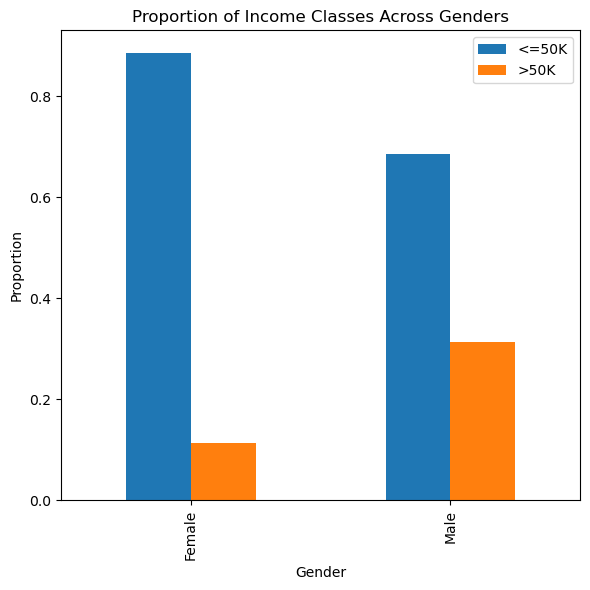

In [18]:
 # Calculate the proportion of income classes across genders (assuming 'sex' is the correct column)
income_proportion = adult.groupby('sex')['income'].value_counts(normalize=True).unstack()

# Plot the bar graph
income_proportion.plot(kind='bar', figsize=(6, 6))
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Income Classes Across Genders')

# Display the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.show()

### 3.9. Occupation vs Income

C:\Users\joya_\AppData\Local\Temp\ipykernel_11096\4232166444.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_proportion = adult.groupby('occupation')['income'].value_counts(normalize=True).unstack()


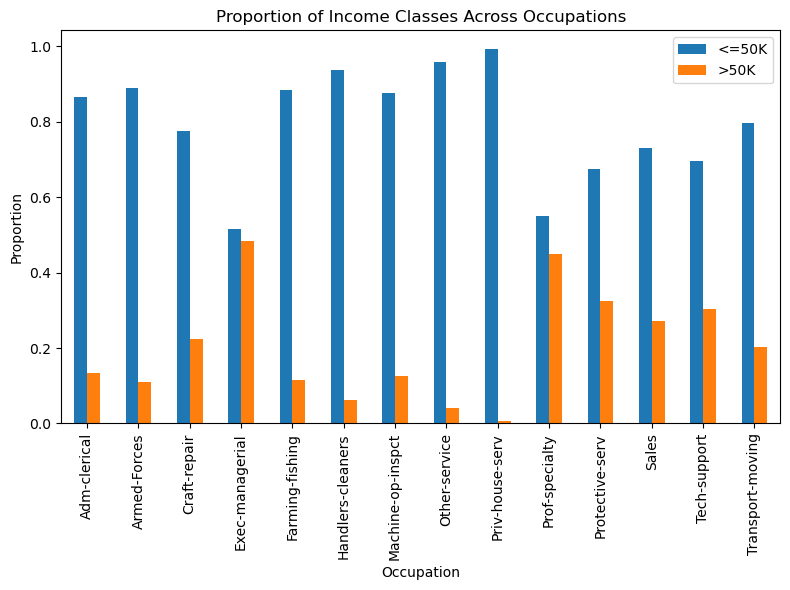

In [19]:
# Remove '?' from the categories in the 'occupation' column
adult['occupation'] = adult['occupation'].cat.remove_categories('?')

# Calculate the proportion of income classes across occupation
income_proportion = adult.groupby('occupation')['income'].value_counts(normalize=True).unstack()

# Plot the bar graph
income_proportion.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.title('Proportion of Income Classes Across Occupations')

# Display the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### 3.10. Workclass vs Income

C:\Users\joya_\AppData\Local\Temp\ipykernel_11096\1166322058.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_proportion = adult.groupby('workclass')['income'].value_counts(normalize=True).unstack()


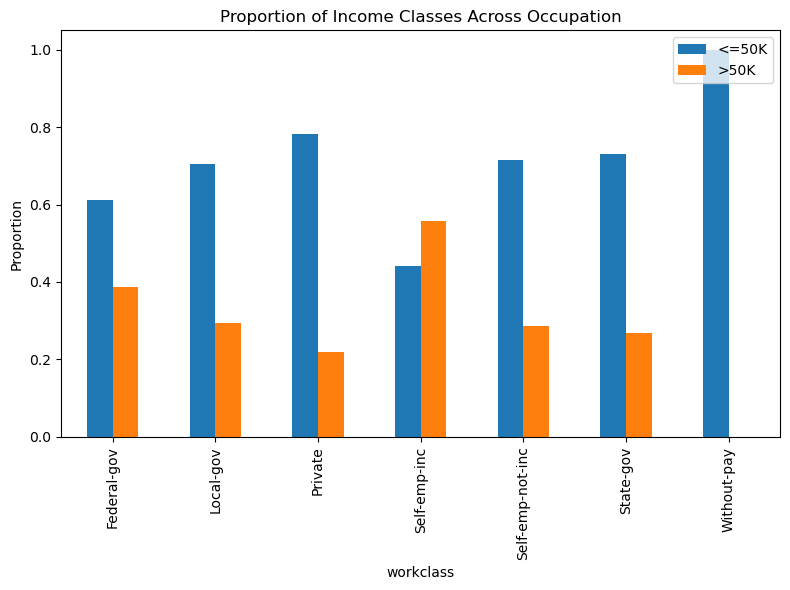

In [20]:
# Calculate the proportion of income classes across workclass
adult['workclass'] = adult['workclass'].cat.remove_categories(['?', 'Never-worked'])
income_proportion = adult.groupby('workclass')['income'].value_counts(normalize=True).unstack()

# Plot the bar graph
income_proportion.plot(kind='bar', figsize=(8, 6))
plt.xlabel('workclass')
plt.ylabel('Proportion')
plt.title('Proportion of Income Classes Across Occupation')

# Display the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 3.10. Race vs Income

C:\Users\joya_\AppData\Local\Temp\ipykernel_11096\378291518.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_proportion = adult.groupby('race')['income'].value_counts(normalize=True).unstack()


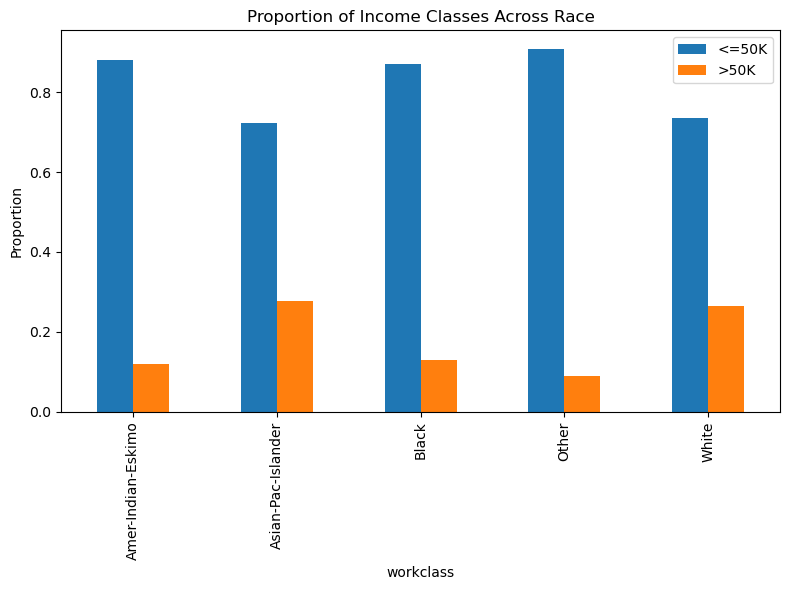

In [21]:
# Calculate the proportion of income classes across workclass
income_proportion = adult.groupby('race')['income'].value_counts(normalize=True).unstack()

# Plot the bar graph
income_proportion.plot(kind='bar', figsize=(8, 6))
plt.xlabel('workclass')
plt.ylabel('Proportion')
plt.title('Proportion of Income Classes Across Race')

# Display the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

---
# 4. Data Transformations

## 4.1. Feature Selection

In [22]:
 print(adult.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [23]:
# Remove education, fnlwgt, and the corrected hours column
adult.drop(columns=['education', 'fnlwgt', 'hours.per.week'], inplace=True)

In [24]:
adult.columns = adult.columns.str.strip()

---
# 5. Model Development & Classification 

## 5.1. Data Preparation'

One-hot encoding is the process of representing multi-class categorical features as binary features, one for each class. Although this process increases the dimensionality of the dataset, classification algorithms tend to work better on this format of data.

We use one-hot encoding to represent all the categorical features in the dataset. 


In [25]:
# Data Prep
adult_data = adult.drop(columns = ['income'])
adult_label = adult.income


adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('category'))
adult_non_cat = adult_data.select_dtypes(exclude = 'category')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')


In [26]:
# Train - Test split
train_data, test_data, train_label, test_label = train_test_split(adult_data_1hot, adult_label, test_size  = 0.25)

In [27]:
# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data) 

In [28]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['>50K','>50K']
    TN = confusion.loc['<=50K','<=50K']
    FP = confusion.loc['<=50K','>50K']
    FN = confusion.loc['>50K','<=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out


## 5.2. Model Development
### 5.2.1. Decision Tree

In [29]:
#Model Development

# Gini 
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.05, min_samples_leaf = 0.001, max_features = None)
clf_gini = clf_gini.fit(train_data, train_label)
clf_gini_pred = clf_gini.predict(test_data)
DTree_Gini = model_eval(test_label, clf_gini_pred)
print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))

printmd('### 5.2.1. Model Evaulation ')
ovl_dtree = round(pd.DataFrame([DTree_Gini], index = ['DTree_Gini']),4)
display(ovl_dtree)

Desicion Tree using Gini Index : 84.52 percent.


### 5.2.1. Model Evaulation 

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
DTree_Gini,0.8452,0.7516,0.5685,0.6473,0.5685,0.9374,0.1548


### 5.2.2. Artificial Neural Network

In [35]:
# Log
ann_log = MLPClassifier(activation='logistic', solver='adam', 
                        alpha=1e-4, hidden_layer_sizes=(10, 8, 6, 4),  # Increased layers and neurons
                        learning_rate='invscaling', 
                        random_state=1, warm_start=True)
ann_log.fit(train_data, train_label)                         
ann_log_pred = ann_log.predict(test_data)
ANN_log = model_eval(test_label, ann_log_pred)
print('ANN using logistic and adam solver: %.2f percent.' % (round(ANN_log['accuracy'] * 100, 2)))

printmd('### 5.2.2. Model Evaluation')
ovl_ann = round(pd.DataFrame([ANN_log], index=['ANN_log']), 4)
display(ovl_ann)

ANN using logistic and adam solver: 84.48 percent.


C:\Users\joya_\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 5.2.2. Model Evaluation

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
ANN_log,0.8448,0.7223,0.6157,0.6648,0.6157,0.9212,0.1552


### 5.2.3. Support Vector Machine

In [37]:
# Linear kernel
svm_clf_linear = svm.SVC(kernel = 'linear')
svm_clf_linear.fit(train_data, train_label)
svm_clf_linear_pred = svm_clf_linear.predict(test_data)
SVM_linear = model_eval(test_label, svm_clf_linear_pred)
print('SVM using linear kernel : %.2f percent.' % (round(SVM_linear['accuracy']*100,2)))

printmd('### 5.2.3. Model Evaulation ')
ovl_svm = round(pd.DataFrame([SVM_linear], index = ['SVM_linear']),4)
display(ovl_svm)

SVM using linear kernel : 84.31 percent.


### 5.2.3. Model Evaulation 

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
SVM_linear,0.8431,0.7248,0.5998,0.6564,0.5998,0.9242,0.1569


### 5.2.4. Ensemble Models

### 5.2.4.1. Adaboost

In [38]:
ada = AdaBoostClassifier(n_estimators=100)                     
ada.fit(train_data, train_label)
ada_pred = ada.predict(test_data)
adaboost = model_eval(test_label, ada_pred)
print('Adaboost : %.2f percent.' % (round(adaboost['accuracy']*100,2)))

printmd('### 5.2.4.1. Model Evaulation ')
ovl_ada = round(pd.DataFrame([adaboost], index = ['adaboost']),4)
display(ovl_ada)

C:\Users\joya_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost : 85.78 percent.


### 5.2.4.1. Model Evaulation 

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8578,0.7657,0.621,0.6858,0.621,0.9367,0.1422


### 5.2.5. Logistic Regression

In [39]:
log_reg = LogisticRegression(penalty = 'l2', dual = False, tol = 1e-4, fit_intercept = True, 
                            solver = 'liblinear')
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)
logistic_reg = model_eval(test_label, log_reg_pred)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg['accuracy']*100,3)))

printmd('### 5.2.5. Model Evaulation ')
ovl_logreg = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
display(ovl_logreg)

Logistic Regression : 84.22 percent.


### 5.2.5. Model Evaulation 

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
logistic_reg,0.8422,0.7242,0.595,0.6533,0.595,0.9245,0.1578


---
# 6. Model Evaluation
## 6.1. Overall Performance Statistics

In [40]:
overall_eval = pd.concat([ovl_dtree, ovl_ann, ovl_svm, ovl_ada, ovl_logreg], axis = 0)
overall_eval.sort_values(by = ['f_measure', 'accuracy'], ascending = False, inplace = True)

printmd('Combing the performance statistics of all the model developed, as seen in table below, \
        we see that the ensemble model Adaboost hast the highest F-measure (0.6833), precision (0.7769) \
        and accuracy (0.8625). The Artificial neural network models are only marginally being in terms of \
        accuracy and F-measure. Almost all the model have an accuracy greater than 0.84 The table below lists the accuracy, error rate, F-measure, precision, recall, sensitivity and \
        specificity of all the models developed.')

display(overall_eval)

Combing the performance statistics of all the model developed, as seen in table below,         we see that the ensemble model Adaboost hast the highest F-measure (0.6833), precision (0.7769)         and accuracy (0.8625). The Artificial neural network models are only marginally being in terms of         accuracy and F-measure. Almost all the model have an accuracy greater than 0.84 The table below lists the accuracy, error rate, F-measure, precision, recall, sensitivity and         specificity of all the models developed.

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8578,0.7657,0.6210,0.6858,0.6210,0.9367,0.1422
ANN_log,0.8448,0.7223,0.6157,0.6648,0.6157,0.9212,0.1552
SVM_linear,0.8431,0.7248,0.5998,0.6564,0.5998,0.9242,0.1569
logistic_reg,0.8422,0.7242,0.5950,0.6533,0.5950,0.9245,0.1578
DTree_Gini,0.8452,0.7516,0.5685,0.6473,0.5685,0.9374,0.1548


## 6.2. ROC Curve

In [41]:
def generateRoc(test_data, test_label, classifiers, pred_labels, plot_labels, limiter):
    
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    y_test = label_binarize(test_label, classes=['<=50K', '>50K'])
    plt.figure()
    
    for i in range(len(classifiers)):
        
        if plot_labels[i] not in limiter:
            continue
        
        y_score = classifiers[i].predict_proba(test_data)
        pos_class_index = list(np.unique(pred_labels[i])).index('>50K')
        
        fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),y_score[:,pos_class_index], pos_label=1)
                               
        lw = 2
        plt.plot(fpr, tpr, color=color[i % len(color)],lw=lw, label=plot_labels[i])
        
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

<IPython.core.display.Javascript object>


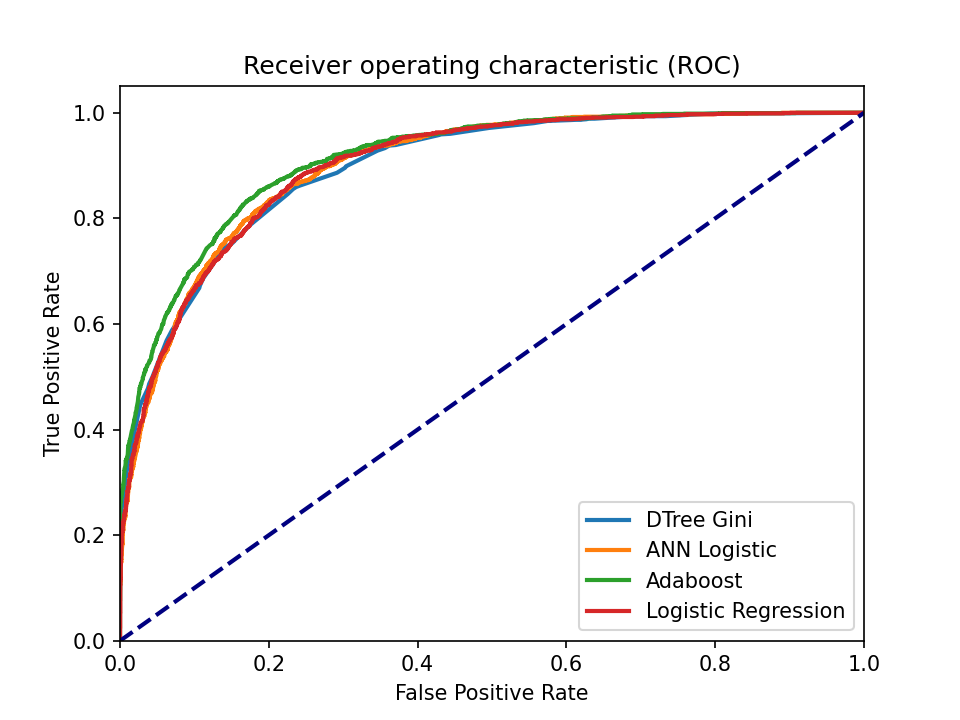

In [42]:
%matplotlib notebook
classifier_list = [clf_gini
                 ,ann_log
                ,ada
                ,log_reg
                ] 
pred_list = [clf_gini_pred
            ,ann_log_pred
            ,ada_pred
            ,log_reg_pred
            ]

clf_labels = ['DTree Gini'
             ,'ANN Logistic'
             ,'Adaboost'
             ,'Logistic Regression'
            ]

limiter = ['Adaboost', 'DTree Gini', 'ANN Logistic', 'Logistic Regression']
generateRoc(test_data, test_label, classifier_list, pred_list, clf_labels, limiter)   

The plot above of the receiver operating characteristic curve for the 4 models; Adaboost, ANN with logistics activation function, DTree Gini and logistic regression model. 

From figure, we can see that the ROC curve of the Adaboost model has the highest lift and is closest to the top left corner (TPR of 1 and FPR of 0) of the plot. The Adaboost model's curve clearly separates itself from the ROC curves of the other 3 models, which overlap with each other. 

---
# 7. Conclusion

The Adaboost model not only has the **highest accuracy**, but also has the **highest precision and F-measure** of all the models developed as a part of this analysis. The advantages of using Adaboost over other models is that they are very simple to implement. Since they are made up of weak individual learners, they are less susceptible to overfitting. However, Adaboost is sensitive to noisy data and outliers. 
